# Deb Argha Saha    
ML - MayJune Batch 1

Exploratory Data Analysis:

**Objective of this analysis:**
    To understand how the student's performance (test scores) is affected by his/her Gender, Ethnicity, Parental Level of Education and Test Preparation Courses

The following analysis will be performed using the pandas package in Python, with the matplotlib and seaborn packages used for graphing.

In [1]:
import pandas as pds
obsdata = pds.read_csv('StudentsPerformance.csv', sep = ',')

In [2]:
obsdata.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
obsdata.shape

(1000, 8)

As we can see, the dataset provided contains 1000 observations and 8 characteristics.

Out of them, 5 are independent variables - data about the student - while 3 are dependent - scores achieved by the student.

In [4]:
obsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
obsdata.columns.tolist()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [6]:
obsdata.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
obsdata.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no null values in the dataset. It only contains integer and object type data.

The object type variables may be considered categorical. The dependent variables are all discrete numerical values.

In [8]:
print(obsdata['race/ethnicity'].unique())

['group B' 'group C' 'group A' 'group D' 'group E']


In [9]:
print("Number of unique races/ethnicities: " + str(obsdata['race/ethnicity'].nunique()))

Number of unique races/ethnicities: 5


In [10]:
print(obsdata['parental level of education'].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [11]:
print("Total different education levels: " + str(obsdata['parental level of education'].nunique()))

Total different education levels: 6


In [12]:
print(obsdata['lunch'].unique())

['standard' 'free/reduced']


Since lunch for every student is either *free/reduced* or *standard*, we can create a new column as boolean values

In [13]:
obsdata['is free or reduced lunch'] = obsdata['lunch'] == 'free/reduced'
obsdata.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,is free or reduced lunch
0,female,group B,bachelor's degree,standard,none,72,72,74,False
1,female,group C,some college,standard,completed,69,90,88,False
2,female,group B,master's degree,standard,none,90,95,93,False
3,male,group A,associate's degree,free/reduced,none,47,57,44,True
4,male,group C,some college,standard,none,76,78,75,False
5,female,group B,associate's degree,standard,none,71,83,78,False
6,female,group B,some college,standard,completed,88,95,92,False
7,male,group B,some college,free/reduced,none,40,43,39,True
8,male,group D,high school,free/reduced,completed,64,64,67,True
9,female,group B,high school,free/reduced,none,38,60,50,True


In [14]:
print(obsdata['test preparation course'].unique())

['none' 'completed']


The test preparation course is only either *not taken* or *completed* in case of all the students.

In [251]:
obsdata['is test prep completed'] = obsdata['test preparation course'] == 'completed'
obsdata.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,is free or reduced lunch,is test prep completed
0,female,group B,bachelor's degree,standard,none,72,72,74,False,False
1,female,group C,some college,standard,completed,69,90,88,False,True
2,female,group B,master's degree,standard,none,90,95,93,False,False
3,male,group A,associate's degree,free/reduced,none,47,57,44,True,False
4,male,group C,some college,standard,none,76,78,75,False,False
5,female,group B,associate's degree,standard,none,71,83,78,False,False
6,female,group B,some college,standard,completed,88,95,92,False,True
7,male,group B,some college,free/reduced,none,40,43,39,True,False
8,male,group D,high school,free/reduced,completed,64,64,67,True,True
9,female,group B,high school,free/reduced,none,38,60,50,True,False


In [253]:
 obsdata.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,is free or reduced lunch,is test prep completed
995,female,group E,master's degree,standard,completed,88,99,95,False,True
996,male,group C,high school,free/reduced,none,62,55,55,True,False
997,female,group C,high school,free/reduced,completed,59,71,65,True,True
998,female,group D,some college,standard,completed,68,78,77,False,True
999,female,group D,some college,free/reduced,none,77,86,86,True,False


**Now, we take a look at the marks/score distribution of the students observed.**

In [16]:
obsdata.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The maximum score obtained in all three areas is **100**. The minimum score obtained is **0** in math, **17** in reading and **10** in writing. The median score in these subjects is close to each other.

# Math Score:--

In [17]:
print("Range of math score is from {} to {}, value is {}".format(obsdata['math score'].min(),
                                                                 obsdata['math score'].max(),
                                                                 obsdata['math score'].max()-obsdata['math score'].min()))

Range of math score is from 0 to 100, value is 100


The most obtained math score is in the range **65 to 70** :--

Default bin is 20, so each bar corresponds to the value of: 5.0


(array([  1.,   1.,   0.,   2.,   3.,   7.,   8.,  18.,  36.,  59.,  86.,
        102., 124., 144., 114., 102.,  76.,  59.,  34.,  24.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 20 Patch objects>)

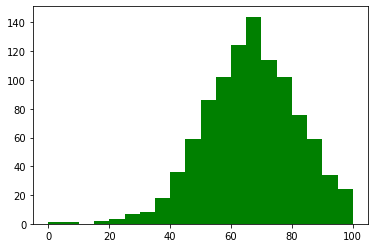

In [18]:
import matplotlib.pyplot as plot
import seaborn as sbrn

print("Default bin is 20, so each bar corresponds to the value of:",(obsdata['math score'].max()-
                                                                     obsdata['math score'].min())/20)
plot.hist(obsdata['math score'], bins=20, color='Green')

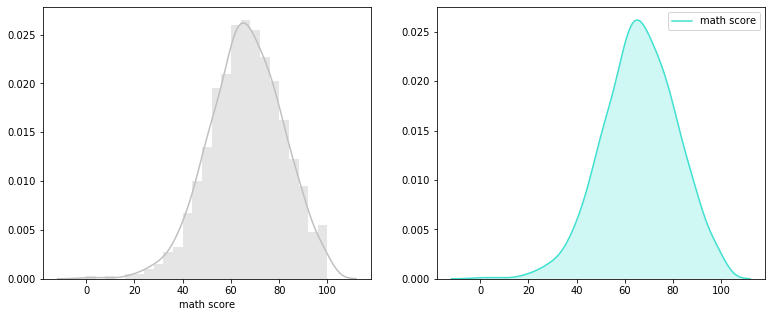

In [162]:
plot.figure(figsize = (20,5))

plot.subplot(1,3,1)
sbrn.distplot(obsdata['math score'],kde=True, color='Silver')
plot.subplot(1,3,2)
sbrn.kdeplot(obsdata['math score'],shade=True, color = 'turquoise')

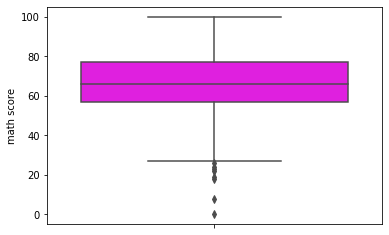

In [22]:
sbrn.boxplot(y='math score',data=obsdata, color='magenta')

**A good measure for the most likely math score is 66.** *Almost* **every student in the dataset has a math score greater than 20.**

In [23]:
Q1 = obsdata['math score'].quantile(.25)
Q3 = obsdata['math score'].quantile(.75)
IQR = Q3 - Q1
Median = obsdata['math score'].median()
print("1st Quartile Value:",Q1)
print("Median Value:",Median)
print("3rd Quartile Value:",Q3)
print("Upper whisker limit:",(Q3 + 1.5*IQR))
print("Lower whisker limit:",(Q1 - 1.5*IQR))

1st Quartile Value: 57.0
Median Value: 66.0
3rd Quartile Value: 77.0
Upper whisker limit: 107.0
Lower whisker limit: 27.0


# Reading Score:--

In [24]:
print("Range of reading score is from {} to {}, value is {}".format(obsdata['reading score'].min(),
                                                                    obsdata['reading score'].max(),
                                                                    obsdata['reading score'].max()-
                                                                    obsdata['reading score'].min()))

Range of reading score is from 17 to 100, value is 83


In [25]:
obsdata['reading score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

The most obtained reading score is in the range 70 to 80 :--

Default bin is 10, so each bar corresponds to the value of: 10


(array([  1.,   7.,  18.,  64., 164., 233., 264., 170.,  79.]),
 array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 9 Patch objects>)

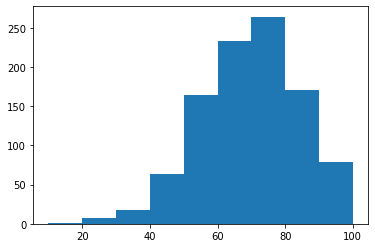

In [26]:
print("Default bin is 10, so each bar corresponds to the value of: 10")

plot.hist(obsdata['reading score'], bins=[ 10., 20., 30., 40., 50., 60., 70., 80., 90., 100. ])

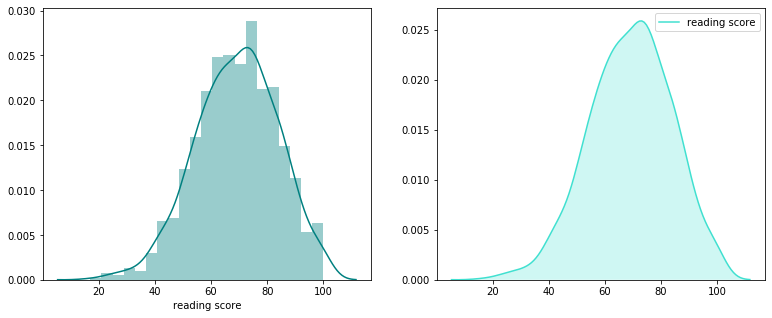

In [99]:
plot.figure(figsize = (20,5))

plot.subplot(1,3,1)
sbrn.distplot(obsdata['reading score'],kde=True, color='Teal')
plot.subplot(1,3,2)
sbrn.kdeplot(obsdata['reading score'],shade=True, color = 'turquoise')

A good measure for the most likely reaing score is 70. *Almost* every student in the dataset has a reading score score greater than 30. 

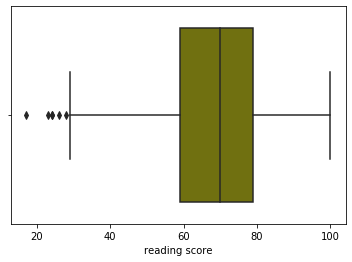

In [30]:
sbrn.boxplot(x='reading score',data=obsdata, color='Olive')

In [31]:
Q1 = obsdata['reading score'].quantile(.25)
Q3 = obsdata['reading score'].quantile(.75)
IQR = Q3 - Q1
Median = obsdata['reading score'].median()
print("1st Quartile Value:",Q1)
print("Median Value:",Median)
print("3rd Quartile Value:",Q3)
print("Upper whisker limit:",(Q3 + 1.5*IQR))
print("Lower whisker limit:",(Q1 - 1.5*IQR))

1st Quartile Value: 59.0
Median Value: 70.0
3rd Quartile Value: 79.0
Upper whisker limit: 109.0
Lower whisker limit: 29.0


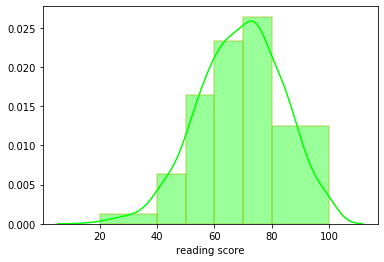

In [32]:
sbrn.distplot(obsdata['reading score'],kde=True,bins=[20,40, 50,60,70,80, 100],hist_kws=dict(edgecolor="Yellowgreen", linewidth=2),color='Lime')

# Writing Score:--

In [35]:
print("Range of writing score is from {} to {}, value is {}".format(obsdata['writing score'].min(),
                                                                    obsdata['writing score'].max(),
                                                                    obsdata['writing score'].max()-
                                                                    obsdata['writing score'].min()))

Range of writing score is from 10 to 100, value is 90


In [36]:
obsdata['reading score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

The most obtained writing score is in the range 67 to 76 :--

Default bin is 30, so each bar corresponds to the value of:  3.0


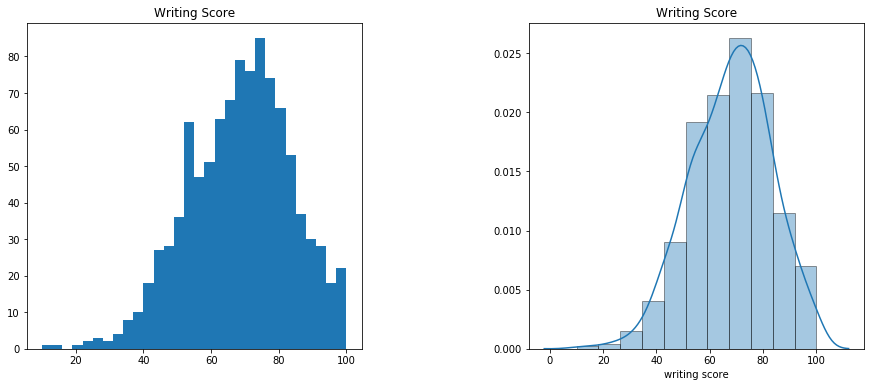

In [233]:
print("Default bin is 30, so each bar corresponds to the value of: ",(obsdata['writing score'].max()-
                                                                     obsdata['writing score'].min())/30)
plot.rcParams['figure.figsize'] = (15,6)
plot.subplots_adjust(wspace=0.5)

plot.subplot(1,2,1)
plot.title('Writing Score')
plot.hist(obsdata['writing score'], bins=30)
plot.subplot(1,2,2)
plot.title('Writing Score')
sbrn.distplot(obsdata['writing score'],kde=True,hist=True,bins=11,hist_kws=dict(edgecolor="k", linewidth=1))

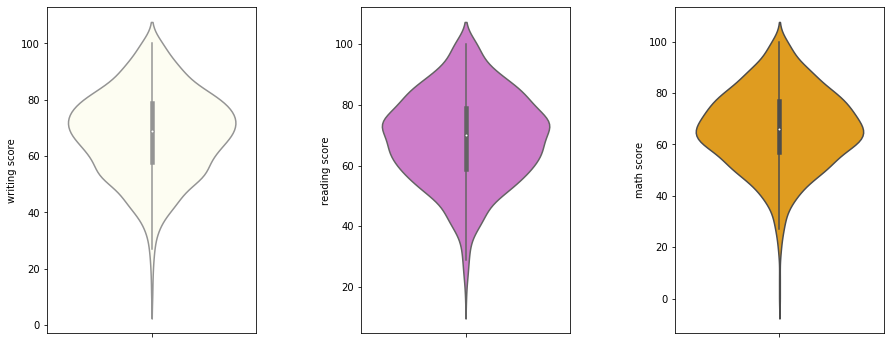

In [152]:
plot.rcParams['figure.figsize'] = (15,6)
plot.subplots_adjust(wspace=0.5)

plot.subplot(1,3,1)
sbrn.violinplot(y='writing score',data=obsdata, color='ivory')
plot.subplot(1,3,2)
sbrn.violinplot(y='reading score',data=obsdata, color='Orchid')
plot.subplot(1,3,3)
sbrn.violinplot(y='math score',data=obsdata, color='Orange')

The data for all the scores is dense around 70. Maximum number of students have scored between 50 to 90 in all the three subjects, **math, reading,** and **writing**.

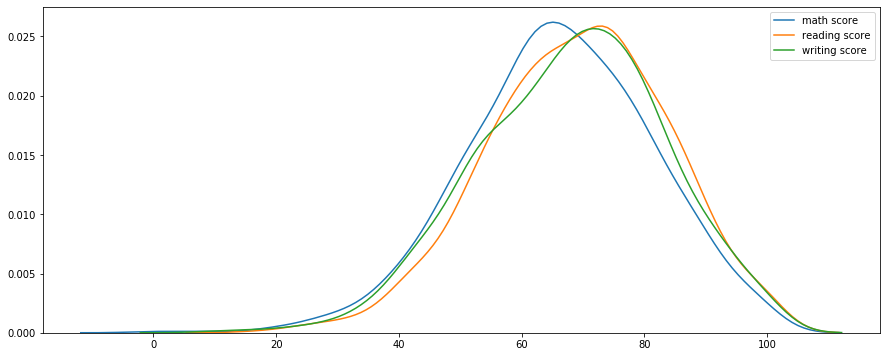

In [164]:
sbrn.kdeplot(obsdata['math score'])
sbrn.kdeplot(obsdata['reading score'])
sbrn.kdeplot(obsdata['writing score'])

The reading score, writing score and math score are closely correlated. Those students who have scored high in reading have also scored high in writing and vice versa. The math score and the reading score also have positive correlation for the given dataset.

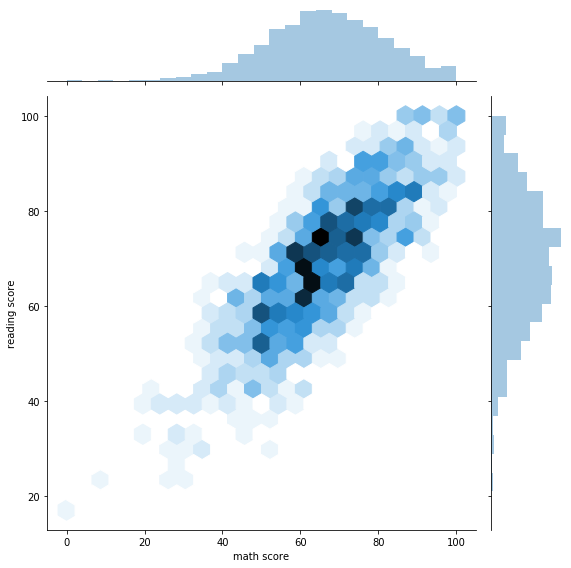

In [238]:
sbrn.jointplot(x="math score", y="reading score", kind="hex", data=obsdata, height =8)

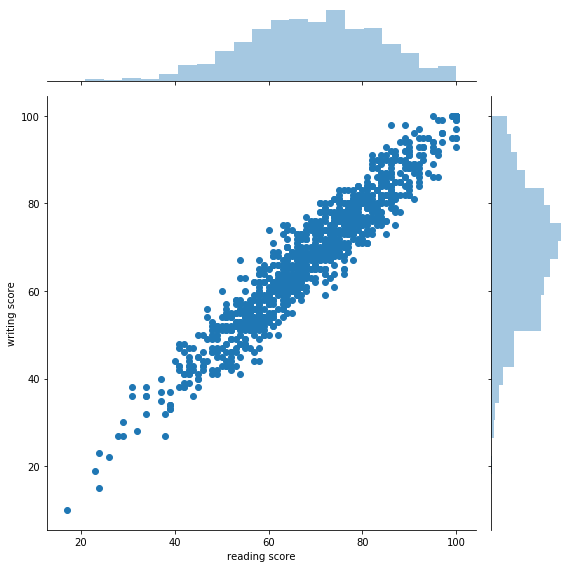

In [160]:
sbrn.jointplot(x="reading score", y="writing score", data=obsdata, height =8)

In [167]:
obsdata.corr()

,math score,reading score,writing score,is free or reduced lunch,is test prep completed
math score,1.000000,0.817580,0.802642,-0.350877,0.177702
reading score,0.817580,1.000000,0.954598,-0.229560,0.241780
writing score,0.802642,0.954598,1.000000,-0.245769,0.312946
is free or reduced lunch,-0.350877,-0.229560,-0.245769,1.000000,0.017044
is test prep completed,0.177702,0.241780,0.312946,0.017044,1.000000


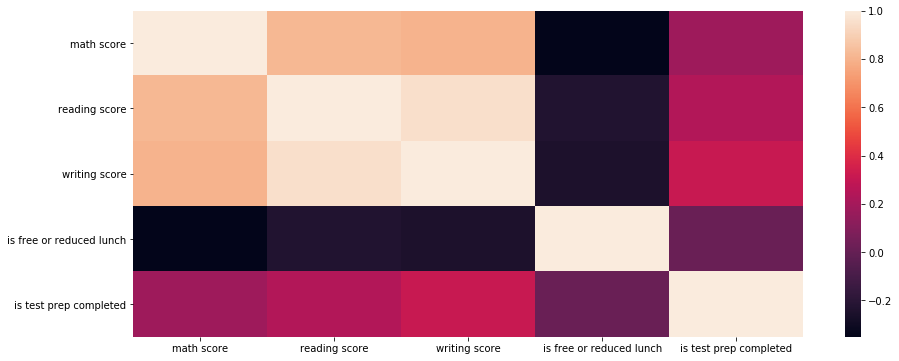

In [165]:
plot.rcParams['figure.figsize'] = (15,6)
sbrn.heatmap(obsdata.corr())

All the scores have high positive correlation amongst each other. The free/reduced lunch pattern has negetive correlation with the test scores. Completion of the Test Preparation Course had a positive correlation with the test scores.

# Categorical Independent Variables:--

([<matplotlib.patches.Wedge at 0x26a57706608>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'none'),
  Text(0.4746018041084478, -0.9923472817199666, 'completed')],
 [Text(-0.2588736606535569, 0.5412803597211218, '64.2%'),
  Text(0.2588737113318806, -0.5412803354836181, '35.8%')])

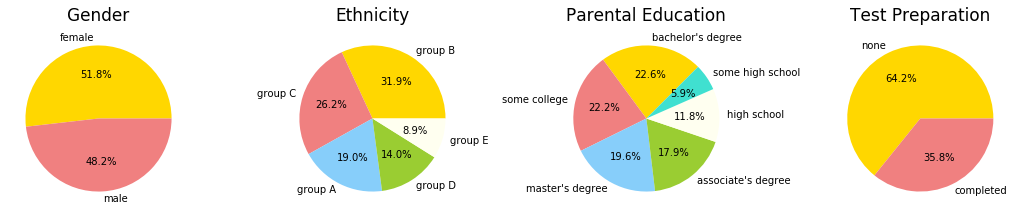

In [200]:
plot.rcParams['figure.figsize'] = (18,9)
plot.subplots_adjust(wspace=0.5)
colors = ['gold', 'lightcoral', 'lightskyblue', 'yellowgreen', 'ivory', 'turquoise']

plot.subplot(1,4,1)
plot.title('Gender', fontsize = 17)
plot.pie(obsdata.gender.value_counts(), 
         labels= obsdata.gender.unique(), 
         autopct='%1.1f%%', 
         colors = colors)
plot.subplot(1,4,2)
plot.title('Ethnicity', fontsize = 17)
plot.pie(obsdata['race/ethnicity'].value_counts(), 
         labels = obsdata['race/ethnicity'].unique(), 
         autopct='%1.1f%%', 
         colors = colors)
plot.subplot(1,4,3)
plot.title('Parental Education', fontsize = 17)
plot.pie(obsdata['parental level of education'].value_counts(), 
         labels = obsdata['parental level of education'].unique(), 
         autopct='%1.1f%%', 
         startangle =45, 
         colors = colors)
plot.subplot(1,4,4)
plot.title('Test Preparation', fontsize = 17)
plot.pie(obsdata['test preparation course'].value_counts(), 
         labels = obsdata['test preparation course'].unique(), 
         autopct='%1.1f%%', 
         colors = colors)

# Categorical - Gender

In [44]:
obsdata.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

There are similar number of female and male students, with females slightly greater in number.

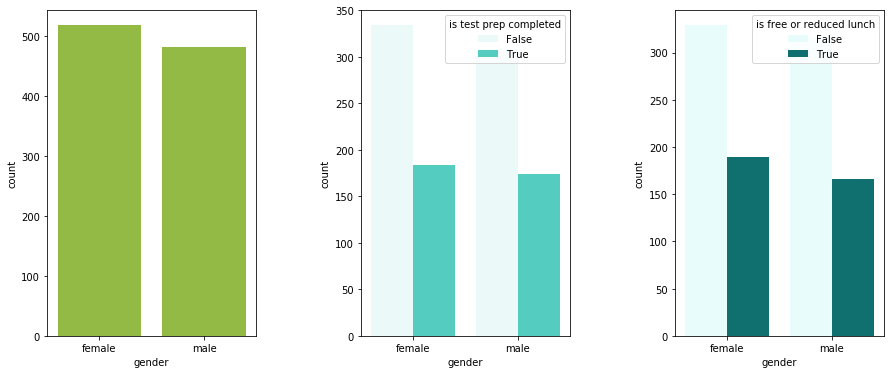

In [210]:
plot.rcParams['figure.figsize'] = (15,6)
plot.subplots_adjust(wspace=0.5)

plot.subplot(1,3,1)
sbrn.countplot(x="gender", data=obsdata, color = 'yellowgreen')
plot.subplot(1,3,2)
sbrn.countplot(x="gender", data=obsdata, hue = 'is test prep completed', color='turquoise')
plot.subplot(1,3,3)
sbrn.countplot(x="gender", data=obsdata, hue = 'is free or reduced lunch', color='teal')

*Similar numbers of male and female students have taken test preparation courses. Similar numbers of male and female students avail free/reduced lunch*.

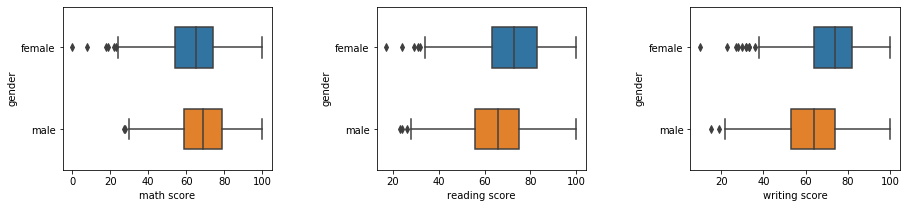

In [239]:
plot.rcParams['figure.figsize'] = (15,3)
plot.subplots_adjust(wspace=0.5)

plot.subplot(1,3,1)
sbrn.boxplot(x='math score',y='gender',data=obsdata, width=0.5)
plot.subplot(1,3,2)
sbrn.boxplot(x='reading score',y='gender',data=obsdata, width=0.5)
plot.subplot(1,3,3)
sbrn.boxplot(x='writing score',y='gender',data=obsdata, width=0.5)

*By a **very slight amount**, male students achieved a higher median math score, but lower median reading and writing scores.*

# Categorical - Race/Ethnicity

In [48]:
obsdata['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

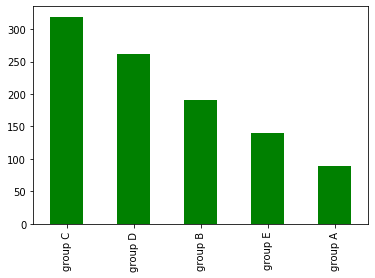

In [49]:
obsdata['race/ethnicity'].value_counts().plot(kind = 'bar', color = 'Green')

Group C has the highest members among the students observed, while Group A has the lowest.

group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: race/ethnicity, dtype: float64


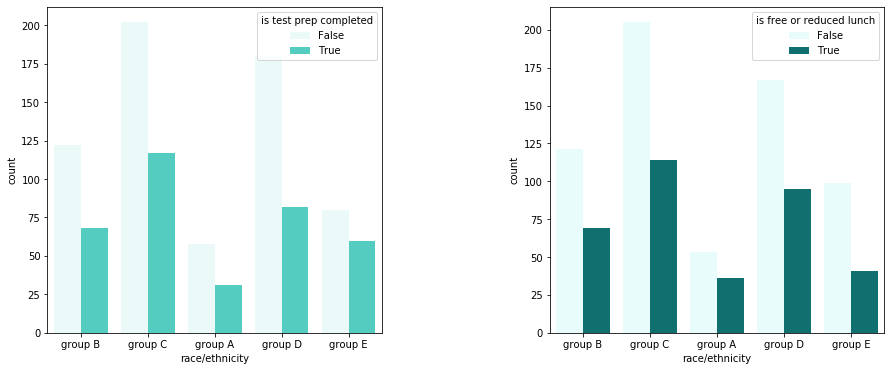

In [107]:
print(obsdata['race/ethnicity'].value_counts(normalize = True))

plot.rcParams['figure.figsize'] = (15,6)
plot.subplots_adjust(wspace=0.5)

plot.subplot(1,2,1)
sbrn.countplot(x="race/ethnicity", data=obsdata, hue = 'is test prep completed', color = 'turquoise')
plot.subplot(1,2,2)
sbrn.countplot(x="race/ethnicity", data=obsdata, hue = 'is free or reduced lunch', color = 'teal')

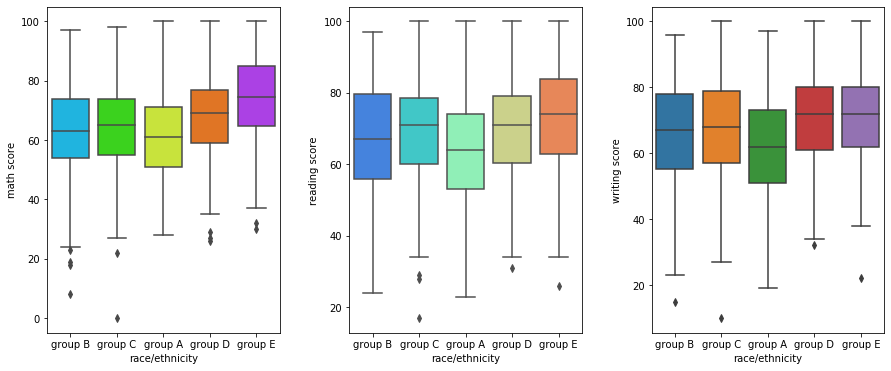

In [241]:
plot.rcParams['figure.figsize'] = (15,6)
plot.subplots_adjust(wspace=0.3)

plot.subplot(1,3,1)
sbrn.boxplot(y='math score',x='race/ethnicity',data=obsdata, palette='gist_ncar')
plot.subplot(1,3,2)
sbrn.boxplot(y='reading score',x='race/ethnicity',data=obsdata, palette='rainbow')
plot.subplot(1,3,3)
sbrn.boxplot(y='writing score',x='race/ethnicity',data=obsdata)

Students of the ethnic group E achieved the highest median scores in math and reading. In writing, ethnic groups D and E scored similarly, with the highest median scores amongst the rest.

In [73]:
obsdata.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'is free or reduced lunch', 'is test prep completed'],
      dtype='object')

# Categorical - Parental Level of Education

In [52]:
obsdata['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

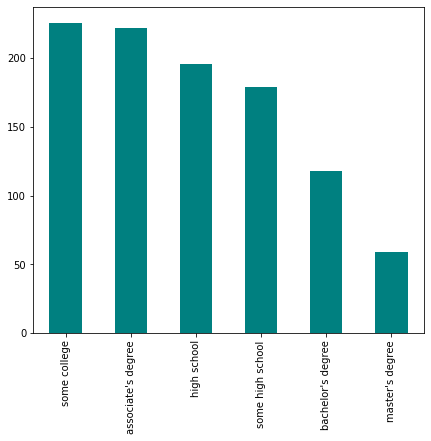

In [246]:
plot.rcParams['figure.figsize'] = (7,6)
obsdata['parental level of education'].value_counts().plot(kind='bar', color ='teal')

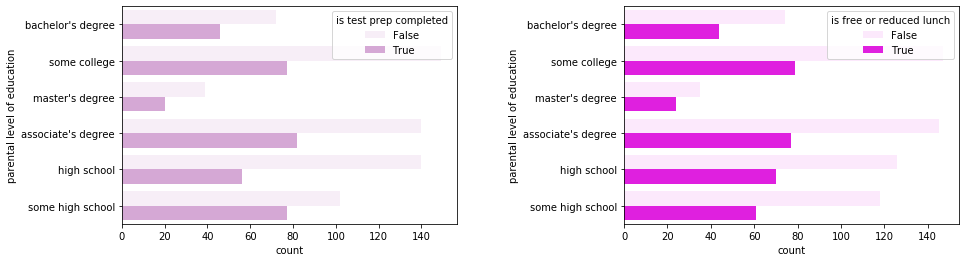

In [149]:
plot.subplots_adjust(wspace=0.5)

plot.subplot(1,2,1)
sbrn.countplot(y="parental level of education", 
               data=obsdata, 
               hue = 'is test prep completed', 
               color = 'plum')
plot.subplot(1,2,2)
sbrn.countplot(y="parental level of education", 
               data=obsdata, 
               hue = 'is free or reduced lunch', 
               color = 'magenta')

Similar percentages of students, amongst various parental levels of education, completed test preparation courses, and availed free/reduced lunches.

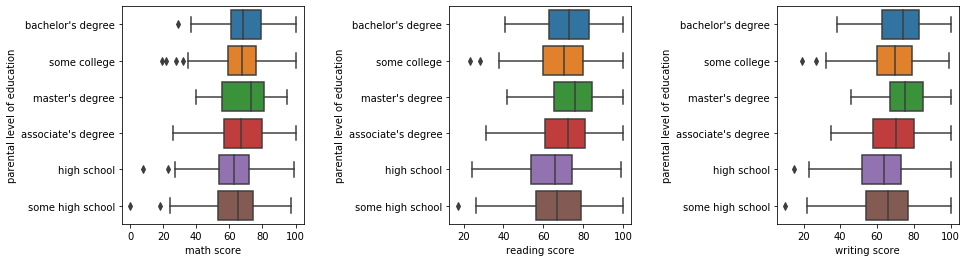

In [150]:
plot.rcParams['figure.figsize'] = (15,4)
plot.subplots_adjust(wspace=0.8)

plot.subplot(1,3,1)
sbrn.boxplot(x='math score',y='parental level of education',data=obsdata)
plot.subplot(1,3,2)
sbrn.boxplot(x='reading score', y='parental level of education',data=obsdata)
plot.subplot(1,3,3)
sbrn.boxplot(x='writing score',y='parental level of education',data=obsdata)

*Those students who have parents with a master's degree, achieved the highest median reading score amongst all the students*. After that comes students whose parents have bachelor's degree, followed by those with associate's degree, some college and then high school.

# Categorical - Test Perparation

In [248]:
obsdata['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

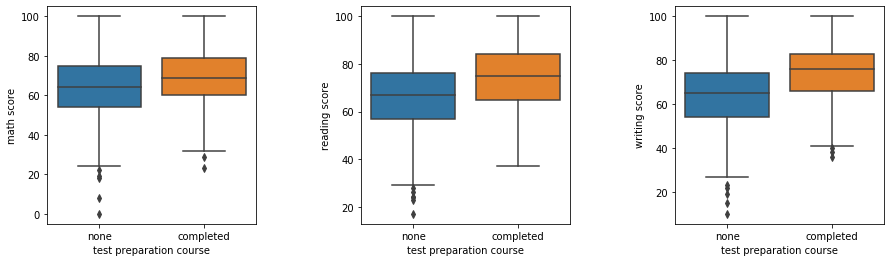

In [144]:
plot.rcParams['figure.figsize'] = (15,4)
plot.subplots_adjust(wspace=0.5)


plot.subplot(1,3,1)
sbrn.boxplot(y='math score',x='test preparation course',data=obsdata)
plot.subplot(1,3,2)
sbrn.boxplot(y='reading score', x='test preparation course',data=obsdata)
plot.subplot(1,3,3)
sbrn.boxplot(y='writing score',x='test preparation course',data=obsdata)

*Those students who have completed the test peparation course, achieved higher median scores than those who did not take such a course, in all three areas.*

# Categorical - Lunch Pattern

In [249]:
obsdata['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

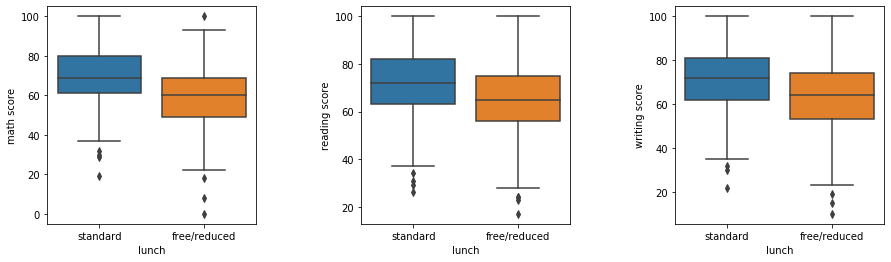

In [250]:
plot.rcParams['figure.figsize'] = (15,4)
plot.subplots_adjust(wspace=0.5)


plot.subplot(1,3,1)
sbrn.boxplot(y='math score',x='lunch',data=obsdata)
plot.subplot(1,3,2)
sbrn.boxplot(y='reading score', x='lunch',data=obsdata)
plot.subplot(1,3,3)
sbrn.boxplot(y='writing score',x='lunch',data=obsdata)

*Those students who avail the free/reduced lunch, also achieve lower median scores than those who avail standard lunch, in all three areas.*

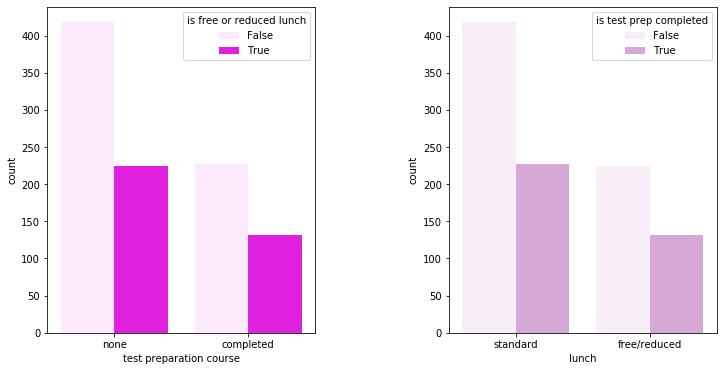

In [276]:
plot.rcParams['figure.figsize'] = (12,6)
plot.subplots_adjust(wspace=0.5)

plot.subplot(1,2,1)
sbrn.countplot(x="test preparation course", 
               data=obsdata, 
               hue = 'is free or reduced lunch', 
               color = 'magenta')
plot.subplot(1,2,2)
sbrn.countplot(x="lunch", 
               data=obsdata, 
               hue = 'is test prep completed', 
               color = 'plum')